In [1]:
from random import *
import math
import argparse

from PIL import Image, ImageDraw, ImageOps

from tools.filters import *
from tools.strokesort import *
import tools.perlin
from tools.util import *
from tools.colorchannels import image_to_cmyk_parts

import matplotlib.pyplot as plt
import numpy as np
import cv2

import linedraw

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
def display_cmyk_grid(c, m, y, k):
    fig, axes = plt.subplots(2, 2, figsize=(8, 8))
    fig.suptitle('CMYK Channels', fontsize=14)

    images = [c, m, y, k]
    titles = ['Cyan Channel', 'Magenta Channel', 'Yellow Channel', 'Black Channel']

    for ax, img, title in zip(axes.flatten(), images, titles):
        ax.imshow(img, cmap='gray')
        ax.set_title(title, fontsize=12)
        ax.axis('off')

    plt.tight_layout(rect=[0, 0, 1, 1]) 
    plt.show()

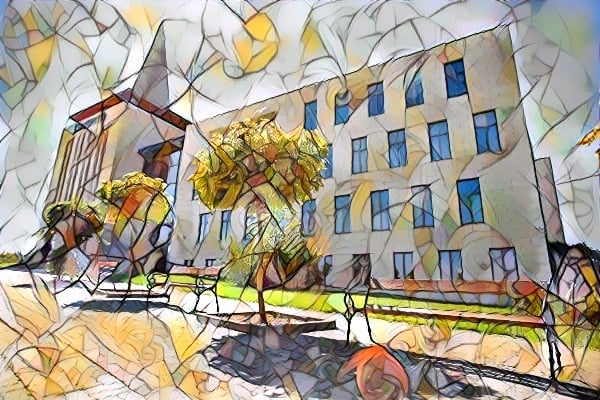

In [3]:
path = "images/sapi1.jpeg"
image = Image.open(path).convert("RGB")
image

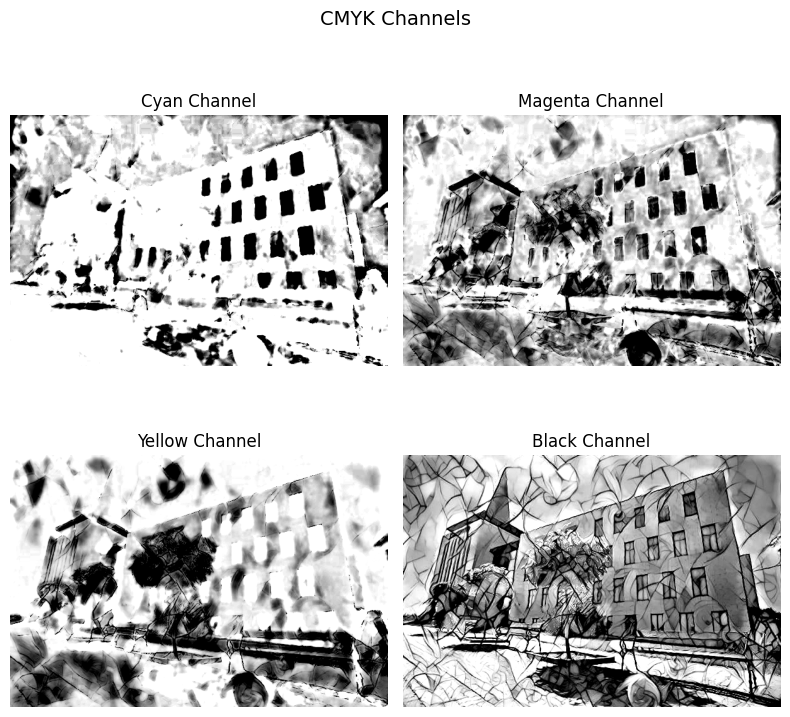

In [4]:
c, m, y, k = image_to_cmyk_parts(image)
contrast = 10
c, m, y, k = [ImageOps.autocontrast(im, contrast) for im in (c, m, y, k)]
display_cmyk_grid(c, m, y, k)

In [1]:
import json 

with open(f'json/sapi1_cs5_hs32.json') as fin:
    json_data = json.load(fin)

width = json_data['width']
height = json_data['height']
line_data = json_data['lines']

In [2]:
left_down_xy = [0.1790, -0.0597]
right_up_xy = [0.3489, 0.1134]
x0, y0 = left_down_xy
x1, y1 = right_up_xy
xd, yd = x1 - x0, y1 - y0
if yd / xd < height / width:
    factor = yd / height
else:
    factor = xd / width

def transpose_coord(dot):
    y_h, x_w = dot
    xt, yt = x_w * factor + x0, y_h * factor + y0
    return xt, yt

In [ ]:
on_paper_tcp = [0, 0, 0, 0, 0, 0]
above_paper_tcp = [0, 0, 0, 0, 0, 0]

for color, lines in line_data.items():
    # pick the right color marker

    # go above the paper 
    for line in lines:
        first_dot = line[0]
        xt, yt = transpose_coord(first_dot)
        new_tcp = [xt, yt] + on_paper_tcp[:2]
        # move above the first dot

        for dot in line:
            # transpose coordinate 
            xt, yt = transpose_coord(dot)
            new_tcp = [xt, yt] + on_paper_tcp[:2]
            # moveL to the transposed point
            
        # move above the last dot
        
    # put back the color marker
        